In [1]:
%pip install openai
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
from IPython.display import Image, display
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from openai import OpenAI
import os
from PIL import Image

# Initializing OpenAI client - see https://platform.openai.com/docs/quickstart?context=python
client = OpenAI(
    api_key = os.environ["OPENAI_API_KEY"],
)

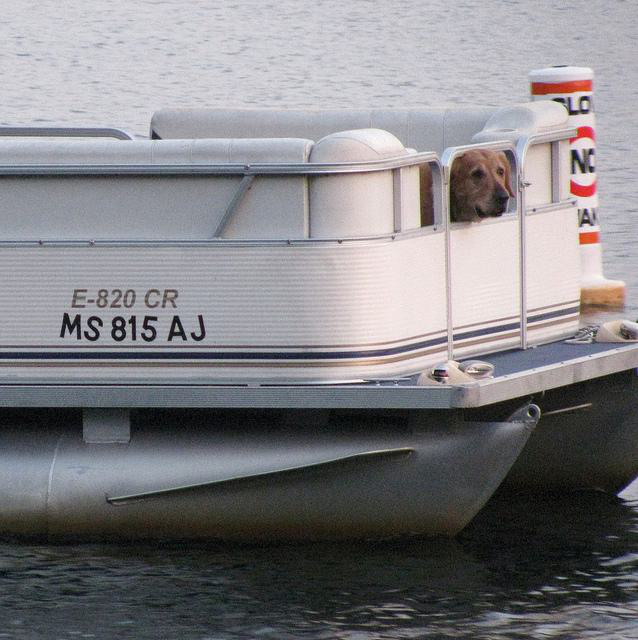

In [5]:
example_image_filepath = "datasets/images/COCO_val2014_000000000400.jpg"
example_image = Image.open(example_image_filepath)
display(example_image)

Data URL: 

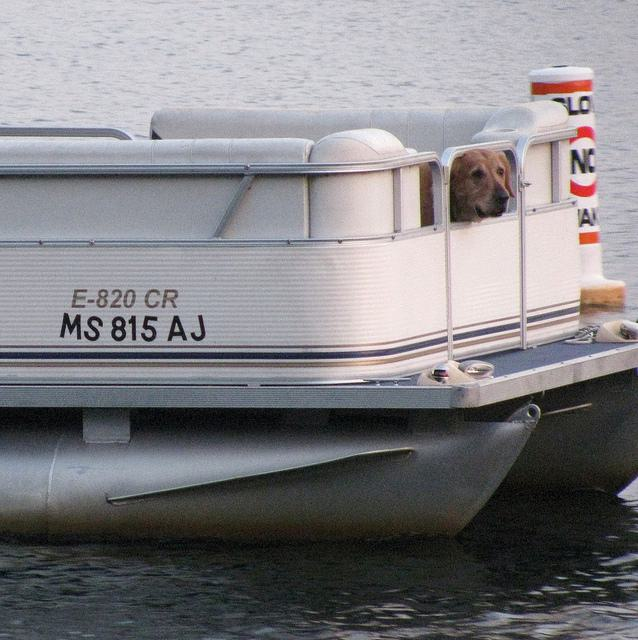

In [11]:
#setup local image file path to be processed by OpenAI
import base64
from mimetypes import guess_type

# Function to encode a local image into data URL 
def local_image_to_data_url(image_path):
    mime_type, _ = guess_type(image_path)
    if mime_type is None:
        mime_type = 'application/octet-stream'

    with open(image_path, "rb") as image_file:
        base64_encoded_data = base64.b64encode(image_file.read()).decode('utf-8')

    return f"data:{mime_type};base64,{base64_encoded_data}"

# Example usage
data_url = local_image_to_data_url(example_image_filepath)
print("Data URL:", data_url)

In [16]:
describe_system_prompt = '''
    You are a system generating descriptions for furniture items, decorative items, or furnishings on an e-commerce website.
    Provided with an image and a title, you will describe the main item that you see in the image, giving details but staying concise.
    You can describe unambiguously what the item is and its material, color, and style if clearly identifiable.
    If there are multiple items depicted, refer to the title to understand which item you should describe.
    '''

def describe_image(img_url):
    response = client.chat.completions.create(
    model="gpt-4-vision-preview",
    temperature=0.2,
    messages=[
        {
            "role": "system",
            "content": describe_system_prompt
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "image_url",
                    "image_url": img_url,
                },
            ],
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "What's in this image?"
                }
            ]
        }
    ],
    max_tokens=300,
    )

    return response.choices[0].message.content

In [17]:
print(describe_image(data_url))

The image shows a pontoon boat on the water with a dog peeking out from behind the boat's fencing. The boat has a silver or gray color scheme and appears to be a standard pontoon design with cylindrical floats on the bottom for buoyancy and a flat deck for passengers. The registration numbers and letters are visible on the side of the boat. In the background, there is a buoy with the word "SLOW NO WAKE" indicating a speed restriction area on the water.
